# DNA Barcoding Chromatogram Explorer

Let's open an .ab1 file, aka trace file, aka chromatogram, using BioPython.

In [76]:
import os
from ipywidgets import widgets

sequence_dropdown = widgets.Dropdown(options=os.listdir('./trace_files'))
display(sequence_dropdown)

Dropdown(options=('oc.laedaporous-ITS1-F.ab1', 'pink.fuzzy.mold-ITS1-F.ab1'), value='oc.laedaporous-ITS1-F.ab1…

Let's take a look at some of the annotation data in the file.

In [88]:
import pandas as pd
from Bio import SeqIO

selected_file = sequence_dropdown.value
selected_file_path = './trace_files/{}'.format(selected_file)

In [138]:
chromatogram = SeqIO.read(selected_file_path, 'abi')

annotations_df = pd.DataFrame.from_dict(chromatogram.annotations,
                                        orient='index',
                                        columns=['Value'])
display(annotations_df)

,Value
sample_well,b'G10'
dye,b'Z-BigDyeV3'
polymer,b'POP7 '
machine_model,b'3730'
run_start,2020-11-25 20:47:19
run_finish,2020-11-25 22:03:24
abif_raw,"{'AEPt1': 11194, 'AEPt2': 11194, 'APFN2': b'KB..."
molecule_type,DNA


The chromatogram data lives in the `abif_raw` row. Let's take a closer look.

In [158]:
annotations_df.loc['abif_raw']['Value'].keys()

dict_keys(['AEPt1', 'AEPt2', 'APFN2', 'APXV1', 'APrN1', 'APrV1', 'APrX1', 'ARTN1', 'ASPF1', 'ASPt1', 'ASPt2', 'AUDT1', 'B1Pt1', 'B1Pt2', 'BCTS1', 'BufT1', 'CMNT1', 'CTID1', 'CTNM1', 'CTOw1', 'CTTL1', 'CpEP1', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'DATA8', 'DATA9', 'DATA10', 'DATA11', 'DATA12', 'DCHT1', 'DSam1', 'DySN1', 'Dye#1', 'DyeN1', 'DyeN2', 'DyeN3', 'DyeN4', 'DyeW1', 'DyeW2', 'DyeW3', 'DyeW4', 'EPVt1', 'EVNT1', 'EVNT2', 'EVNT3', 'EVNT4', 'FTab1', 'FVoc1', 'FWO_1', 'Feat1', 'GTyp1', 'HCFG1', 'HCFG2', 'HCFG3', 'HCFG4', 'InSc1', 'InVt1', 'LANE1', 'LIMS1', 'LNTD1', 'LsrP1', 'MCHN1', 'MODF1', 'MODL1', 'NAVG1', 'NLNE1', 'NOIS1', 'PBAS1', 'PBAS2', 'PCON1', 'PCON2', 'PDMF1', 'PDMF2', 'PLOC1', 'PLOC2', 'PSZE1', 'PTYP1', 'PXLB1', 'RGNm1', 'RGOw1', 'RMXV1', 'RMdN1', 'RMdV1', 'RMdX1', 'RPrN1', 'RPrV1', 'RUND1', 'RUND2', 'RUND3', 'RUND4', 'RUNT1', 'RUNT2', 'RUNT3', 'RUNT4', 'Rate1', 'RunN1', 'S/N%1', 'SCAN1', 'SMED1', 'SMLt1', 'SMPL1', 'SPAC1', 'SPAC2', 'SPAC3', 'SVER

To make sense of these fields within the raw abi data, we can refer to the [ABIF File Format spec](docs/ABIF_File_Format.pdf).

Here is a more human-readable summary of some additional info found in the raw data.

In [221]:
abif_raw = annotations_df.loc['abif_raw']['Value']
pd.DataFrame.from_dict({
  'User':                      abif_raw['User1'],
  'Stop Point':                abif_raw['AEPt1'],
  'Start Point':               abif_raw['ASPt1'],
  'Peak Area Ratio':           abif_raw['phAR1'],
  'Peak Spacing':              abif_raw['SPAC3'],
  'Max Quality Value':         abif_raw['phQL1'],
  'Last Successful Analysis':  abif_raw['BCTS1'],
  'Signal Level for Each Dye': abif_raw['S/N%1'],
  'Sample Comment':            abif_raw['CMNT1'],
  'Container ID':              abif_raw['CTID1'],
  'Container Name':            abif_raw['CTNM1'],
  'Container Owner':           abif_raw['CTOw1']},
    orient='index',
    columns=['Raw Data Fields'])

,Raw Data Fields
User,b'genewiz'
Stop Point,11194
Start Point,1684
Peak Area Ratio,-1
Peak Spacing,13.9569
Max Quality Value,99
Last Successful Analysis,b'2020-11-25 22:07:02 -05:00'
Signal Level for Each Dye,"(1385, 1646, 1806, 1810)"
Sample Comment,b'2377975-G10-JoshMcGinnis-30-449493217-JM2'
Container ID,b'09A000036479'


### Now let's take a look at the sequence data

In [265]:
sequence = abif_raw['PBAS1']
print('# Base Pairs: {}'.format(len(sequence)))
sequence

# Base Pairs: 746


b'NNNNNGNNNCGNNNNNGACCTGCGGANGANNTTACCGAGTTTCTTNTCCCNNACCCCTGGGAACTTACTCTAATGTTGCCTCGCCGGATCGTCCCGCCTCCCTTTAAATCGGACTGCCCGCCNTATGACCCCTTTTCCAAGGTTTGTTATTGTAACTTCTGANATCNCATCTTTGTTGGATGTAACTTTTTNCAANGNATCTCTTGGGTTGGGCTTCAACTAGGAACTGAGCTCTTTGCGATAANNAATGNGATGTGCANAATTCAACGAATCNNATAATCTTTGAAGTCACATTGTGCCCGCTGGTATTCCGGCGGATATGCCTGTTCTAGCGTCCTTTCAACCCTCAAGNCCCCGGGTNTGGTGTTGGGGATCGGCTCTGCCCTTCTGGGCGGTGCCGCCCCNCAAANNNNTGGCGGTCTTTGAACACNTTCCATNNTCCTTGGTATAACGAGGAGCATGCCTGTTTNNTGTCATTATATTCTAAAACCCCNACTTCTGAATGNNNACCTCNANNTTGGANTGANTNNNGTTTGNNNNNTNCTTNNTNNNNNNCCNCACCACTGAAATGCATTAGCGGAATCGTCTGCNATCTGCCACAAGTGTGATAACTTATCTACACTGGCGAGGGGATTGCTTTCTGATGTTCAGCTTCTAATCGTCTAAGGACAATTTCTTGAATGCTTGACCTCAAATCANGTANGACTACCCGCTGAACTTAAGCANNNANNAAAANNNGNANNAAN'

Let's take a look at the Phred (_quality_) scores for each base.

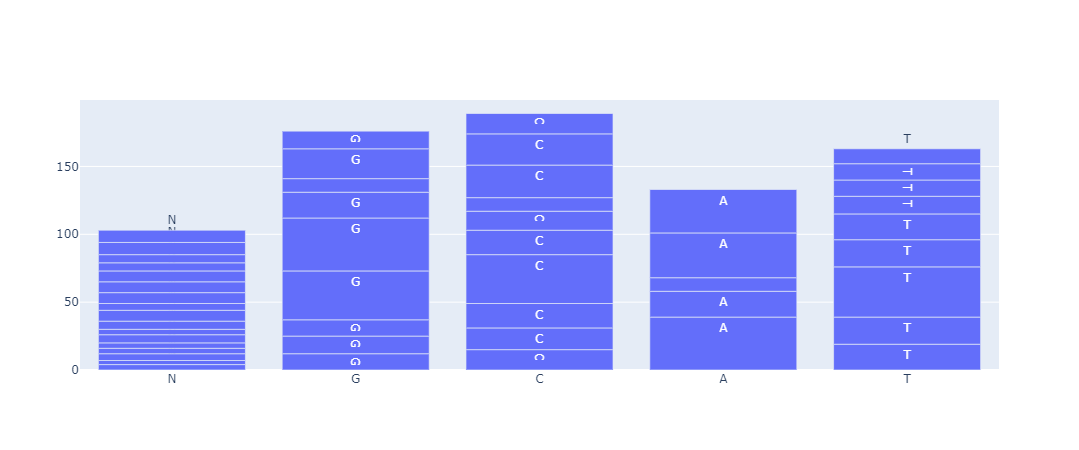

In [334]:
import plotly.graph_objects as go

seq = list(sequence[0:50].decode('UTF-8'))

fig = go.Figure(data=[go.Bar(
            x = seq,
            y=chromatogram.letter_annotations['phred_quality'][0:50],
            text=seq,
            textposition='auto',
        )])

fig.show()